In [1]:
import sys
import os
from typing import Tuple

sys.path.append('/home/danillorp/Área de Trabalho/github/fema/src/')


import fema_classifier
import fema_feature_learning
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
from keras.datasets import mnist

2024-03-08 20:33:18.290987: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-08 20:33:18.351523: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 20:33:18.351576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 20:33:18.353671: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-08 20:33:18.365344: I tensorflow/core/platform/cpu_feature_guar

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [4]:
print('X_train: ' + str(train_x.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifiers = {'DecisionTreeClassifier()':DecisionTreeClassifier(),
               'RandomForestClassifier()':RandomForestClassifier()}


In [6]:
train_x_ravel = train_x.reshape(train_x.shape[0],train_x.shape[1]*train_x.shape[2])
test_x_ravel = test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2])

In [7]:
for c in classifiers:
    classifiers[c].fit(train_x_ravel,train_y)
    pred = classifiers[c].predict(test_x_ravel)

    cm = confusion_matrix(test_y,pred)
    bal = balanced_accuracy_score(test_y, pred)
    acc = accuracy_score(test_y, pred)

    print('*****',c,'*******')
    print('CM ',c,'Original:',cm)
    print('BalAcc ',c,' Original:',bal)
    print('Acc ',c,'Original:',acc)
    print('************')

***** DecisionTreeClassifier() *******
CM  DecisionTreeClassifier() Original: [[ 915    0   11    4    6   12    9    2    9   12]
 [   2 1088    9    9    3    7    6    3    7    1]
 [  11    8  883   33   16    8   13   29   22    9]
 [   8    7   29  852   10   41    4   12   27   20]
 [   5    3   11    6  863    8   14    8   19   45]
 [  14    6    4   45    6  757   24    3   21   12]
 [  16    5   12    9   18   22  847    1   24    4]
 [   3   10   21   18    8    3    2  934   11   18]
 [   9    6   32   37   24   36   13   11  780   26]
 [  13    3    8   17   43   15    7   19   24  860]]
BalAcc  DecisionTreeClassifier()  Original: 0.8764766051886598
Acc  DecisionTreeClassifier() Original: 0.8779
************
***** RandomForestClassifier() *******
CM  RandomForestClassifier() Original: [[ 971    0    1    0    0    1    2    1    4    0]
 [   0 1122    3    4    0    2    2    0    1    1]
 [   5    0 1003    6    3    0    3    8    4    0]
 [   0    0    8  981    0    4

In [8]:
model_fl = fema_feature_learning.FEMaFeatureLearning(k=10,basis=fema_classifier.Basis.radialBasis)

print(train_x.shape, train_x_ravel.shape, train_y.shape)
_x, eval_x, _y, eval_y = train_test_split(train_x_ravel, train_y, test_size=0.05)
print(eval_x.shape, eval_y.shape)

features_weigths = model_fl.fit(eval_x, eval_y.reshape(eval_y.shape[0],1), np.array([0]), np.array([0]))



(60000, 28, 28) (60000, 784) (60000,)
(3000, 784) (3000,)
Running:  0.0  concluded.
Running:  0.1  concluded.
Running:  0.2  concluded.
Running:  0.3  concluded.
Running:  0.4  concluded.
Running:  0.5  concluded.
Running:  0.6  concluded.
Running:  0.7  concluded.
Running:  0.8  concluded.
Running:  0.9  concluded.


In [9]:
model_fl.features_weigth.reshape(2,10,28,28).shape

(2, 10, 28, 28)

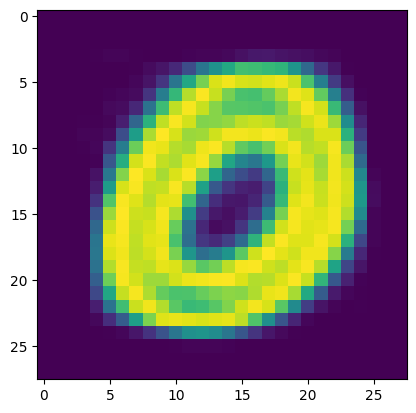

In [10]:
plt.imshow(model_fl.features_weigth[model_fl.INTRA,0].reshape(28,28))

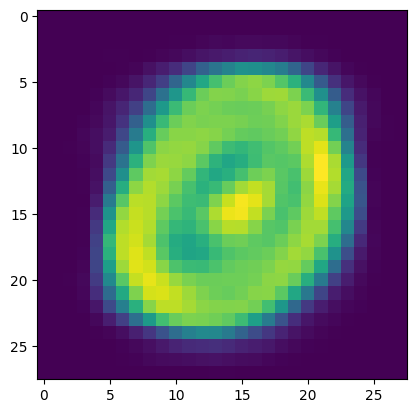

In [11]:
plt.imshow(model_fl.features_weigth[model_fl.INTER,0].reshape(28,28))

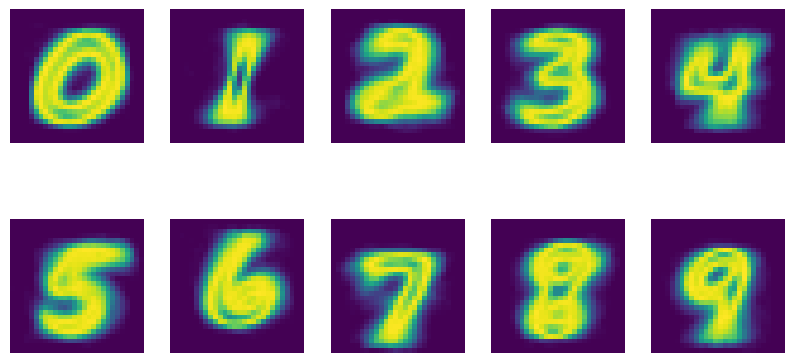

In [12]:
fig = plt.figure(figsize=(10, 5)) 
  
# setting values to rows and column variables 
rows = 2
columns = 5
    
count = 1
for r in range(rows):
    for c in range(columns):
        
        # Adds a subplot at the 1st position 
        fig.add_subplot(rows, columns, count) 
      
        # showing image         
        plt.imshow(model_fl.features_weigth[model_fl.INTRA,count-1].reshape(28,28)) 
        plt.axis('off') 

        count = count+1


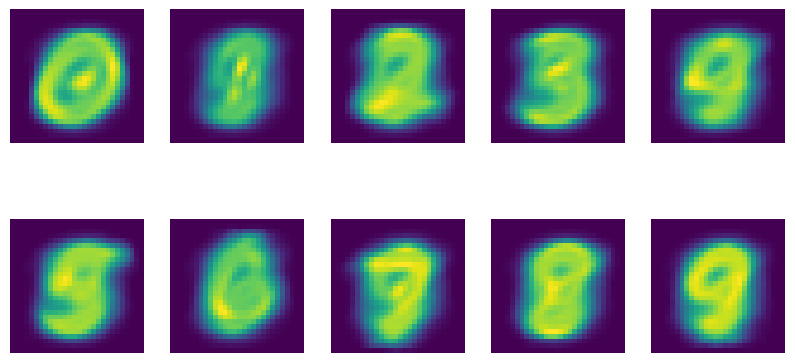

In [13]:
fig = plt.figure(figsize=(10, 5)) 
  
# setting values to rows and column variables 
rows = 2
columns = 5
    
count = 1
for r in range(rows):
    for c in range(columns):
        
        # Adds a subplot at the 1st position 
        fig.add_subplot(rows, columns, count) 
      
        # showing image         
        plt.imshow(model_fl.features_weigth[model_fl.INTER,count-1].reshape(28,28)) 
        plt.axis('off') 

        count = count+1


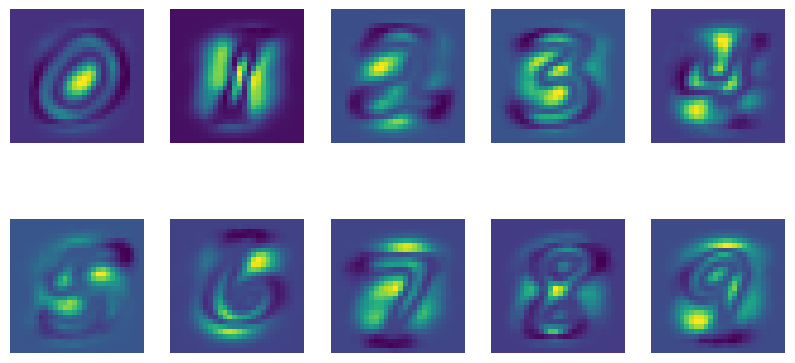

In [14]:
fig = plt.figure(figsize=(10, 5)) 
  
# setting values to rows and column variables 
rows = 2
columns = 5
    
count = 1
for r in range(rows):
    for c in range(columns):
        
        # Adds a subplot at the 1st position 
        fig.add_subplot(rows, columns, count) 
      
        # showing image         
        plt.imshow(model_fl.features_weigth[model_fl.INTER,count-1].reshape(28,28)-(model_fl.features_weigth[model_fl.INTRA,count-1].reshape(28,28))) 
        plt.axis('off') 

        count = count+1


In [15]:
fl_weigths = np.zeros((model_fl.features_weigth.shape[2]))
n_classes = len(set(train_y))

for c in range(n_classes):
    for f in range(train_x_ravel.shape[1]):
        fl_weigths[f] = fl_weigths[f] + (features_weigths[model_fl.INTER, c, f]+features_weigths[model_fl.INTRA, c, f])/n_classes

max_w = np.max(fl_weigths)
for f in range(train_x_ravel.shape[1]):
    fl_weigths[f] = fl_weigths[f]/max_w

In [16]:
fl_weigths

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.90396375e-04,
       1.47020274e-03, 1.46441454e-03, 5.89989703e-04, 9.13844218e-04,
       3.19036198e-03, 3.57780536e-03, 1.32908991e-03, 2.75527787e-03,
       4.53418657e-03, 3.37237166e-03, 4.06086243e-03, 2.43710989e-03,
       1.26036353e-03, 1.46441454e-03, 1.21552195e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

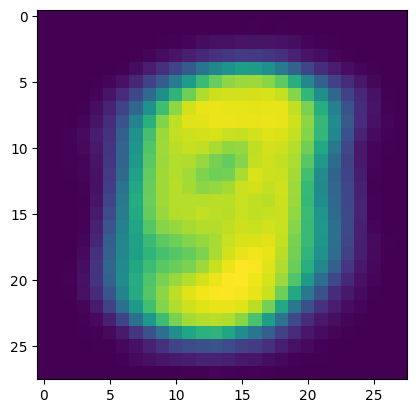

In [17]:
plt.imshow(fl_weigths.reshape(28,28))

In [18]:
train_x_cp = train_x_ravel.copy()
test_x_cp  = test_x_ravel.copy()

for c in range(len(set(train_y))):

    for f in range(train_x_cp.shape[1]):
        mask_inter = train_y != c
        mask_intra = train_y == c
        
        train_x_cp[:,f] =   (train_x_cp[:,f])*  (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])
        test_x_cp[:,f] =    (test_x_cp[:,f]) * (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])


/tmp/ipykernel_266916/157218497.py:10: RuntimeWarning: invalid value encountered in scalar divide
  train_x_cp[:,f] =   (train_x_cp[:,f])*  (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])
/tmp/ipykernel_266916/157218497.py:10: RuntimeWarning: invalid value encountered in cast
  train_x_cp[:,f] =   (train_x_cp[:,f])*  (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])
/tmp/ipykernel_266916/157218497.py:11: RuntimeWarning: invalid value encountered in scalar divide
  test_x_cp[:,f] =    (test_x_cp[:,f]) * (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])
/tmp/ipykernel_266916/157218497.py:11: RuntimeWarning: invalid value encountered in cast
  test_x_cp[:,f] =    (test_x_cp[:,f]) * (features_weigths[model_fl.INTER, c, f]/features_weigths[model_fl.INTRA, c, f])
/tmp/ipykernel_266916/157218497.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  train_x_cp[:,f] =   (train_x_cp[:,f])* 

In [19]:
for c in classifiers:
    classifiers[c].fit(train_x_cp,train_y)
    pred = classifiers[c].predict(test_x_cp)

    cm = confusion_matrix(test_y,pred)
    bal = balanced_accuracy_score(test_y, pred)
    acc = accuracy_score(test_y, pred)

    print('*****',c,'*******')
    print('CM ',c,'Original:',cm)
    print('BalAcc ',c,' Original:',bal)
    print('Acc ',c,'Original:',acc)
    print('************')

***** DecisionTreeClassifier() *******
CM  DecisionTreeClassifier() Original: [[ 894    1   16    6    6   20   18    8    5    6]
 [   0 1072   14   10    2    6    2    6   16    7]
 [  19   13  837   35   12   14   23   34   34   11]
 [   9   13   28  804    5   51   12   19   43   26]
 [   1   13   11    7  817   11   20   15   15   72]
 [  19   13   15   45   14  702   22   10   28   24]
 [  18    5   15    5   19   28  845    4   15    4]
 [   5   11   30   21    8    5    2  911   12   23]
 [  12   12   30   50   17   35   27   11  750   30]
 [   8    8   13   22   41   17    6   30   29  835]]
BalAcc  DecisionTreeClassifier()  Original: 0.8448600746436782
Acc  DecisionTreeClassifier() Original: 0.8467
************
***** RandomForestClassifier() *******
CM  RandomForestClassifier() Original: [[ 970    0    2    0    0    2    2    1    2    1]
 [   0 1123    4    2    0    0    4    0    2    0]
 [   7    1  981    8    5    2    8    8   10    2]
 [   1    0   16  949    0   13

In [20]:
train_x_cp = train_x_ravel.copy()
test_x_cp  = test_x_ravel.copy()

for f in range(train_x_cp.shape[1]):
    mask_inter = train_y != c
    mask_intra = train_y == c
    
    train_x_cp[:,f] =   (train_x_cp[:,f]) *  (fl_weigths[f])
    test_x_cp[:,f] =    (test_x_cp[:,f])  *  (fl_weigths[f])


In [21]:
for c in classifiers:
    classifiers[c].fit(train_x_cp,train_y)
    pred = classifiers[c].predict(test_x_cp)

    cm = confusion_matrix(test_y,pred)
    bal = balanced_accuracy_score(test_y, pred)
    acc = accuracy_score(test_y, pred)

    print('*****',c,'*******')
    print('CM ',c,'Original:',cm)
    print('BalAcc ',c,' Original:',bal)
    print('Acc ',c,'Original:',acc)
    print('************')
    

***** DecisionTreeClassifier() *******
CM  DecisionTreeClassifier() Original: [[ 911    2   14    3    3   12   17    4   11    3]
 [   0 1095    7    5    4    9    4    0    9    2]
 [  15    9  878   28   16    9   11   33   25    8]
 [   4    7   24  853    5   53    7   10   28   19]
 [   8    3   11    5  846    9   20   10   15   55]
 [  11    7    8   48    5  735   22    9   30   17]
 [  22    2   18    9   22   21  836    1   24    3]
 [   2   17   17   15    9    6    2  929    8   23]
 [   8    9   36   33   20   28   21   10  781   28]
 [  14    5    9   13   30   16    4   23   26  869]]
BalAcc  DecisionTreeClassifier()  Original: 0.8714622020408674
Acc  DecisionTreeClassifier() Original: 0.8733
************
***** RandomForestClassifier() *******
CM  RandomForestClassifier() Original: [[ 973    0    1    0    0    1    2    1    1    1]
 [   0 1123    2    4    0    2    2    0    1    1]
 [   6    1  995    9    2    0    4    9    6    0]
 [   0    0    8  979    0    5

In [22]:
np.min(fl_weigths), np.max(fl_weigths), np.mean(fl_weigths), np.median(fl_weigths)

(0.0, 1.0, 0.3330286505668184, 0.12325348576304851)

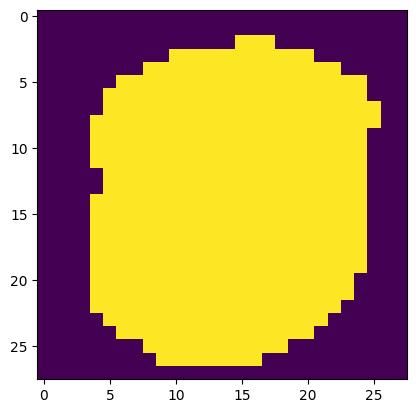

In [23]:
th = 0.05
selected_features = np.where(fl_weigths > th, True, False)
plt.imshow(selected_features.reshape(28,28))

In [24]:
train_x_ravel[:,selected_features].shape

(60000, 450)

In [25]:
for c in classifiers:
    classifiers[c].fit(train_x_cp[:,selected_features],train_y)
    pred = classifiers[c].predict(test_x_cp[:,selected_features])

    cm = confusion_matrix(test_y,pred)
    bal = balanced_accuracy_score(test_y, pred)
    acc = accuracy_score(test_y, pred)

    print('*****',c,'*******')
    print('CM ',c,'Original:',cm)
    print('BalAcc ',c,' Original:',bal)
    print('Acc ',c,'Original:',acc)
    print('************')


***** DecisionTreeClassifier() *******
CM  DecisionTreeClassifier() Original: [[ 910    1   13    3    4   17   12    9    9    2]
 [   1 1097    3    8    2    4    7    2    9    2]
 [  10    9  884   19   13    9   16   31   23   18]
 [   9   10   26  858    3   47    4   11   22   20]
 [   4    3    6    9  850    5   21   18   19   47]
 [  14    4    7   52    8  738   23    4   28   14]
 [  20    3   12    6   22   20  839    2   29    5]
 [   2   13   23   11   11    2    1  929    9   27]
 [  13    7   24   35   30   23   16   11  785   30]
 [  12    7    7   20   36   21    6   19   27  854]]
BalAcc  DecisionTreeClassifier()  Original: 0.8725936819802396
Acc  DecisionTreeClassifier() Original: 0.8744
************
***** RandomForestClassifier() *******
CM  RandomForestClassifier() Original: [[ 969    0    0    0    0    2    3    1    4    1]
 [   0 1125    1    4    0    1    2    0    2    0]
 [   5    0 1000    4    3    0    4   10    6    0]
 [   1    0    7  975    0    7